# 利用pandas matplotlib seaborn对Iris数据集进行可视化分析

https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations

In [37]:
#-*- coding:utf-8 -*-
%matplotlib inline
import pandas as pd
import warnings #忽略seaborn产生的警告信息
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
sns.set(style="white", color_codes=True)

#读入Iris数据
iris = pd.read_csv('Iris.csv')






先查看数据的大体情况

In [39]:

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.6+ KB


可以发现数据集 共有150个样本，每个样本有六列.


再看看数据集的统计特性

In [41]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


这个数据集是三分类问题，我们可以看看每个类别有多少样本,



In [42]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

发现类别均衡

## 画图

然后开始可视化分析

我们可以直接用DataFrame结构中的plot画图，
先画出 特征之间的散点图.

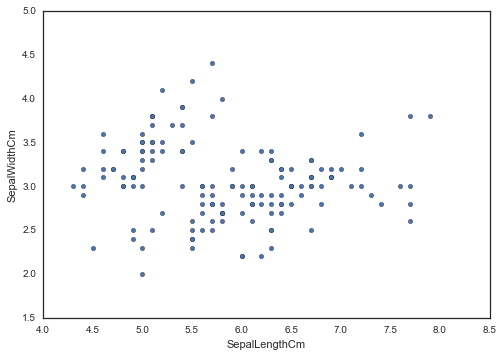

In [44]:

iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")


再利用seaborn 画其他类型的图，jointplot能够同时显示二特征的散点图和每个特征各自的直方图

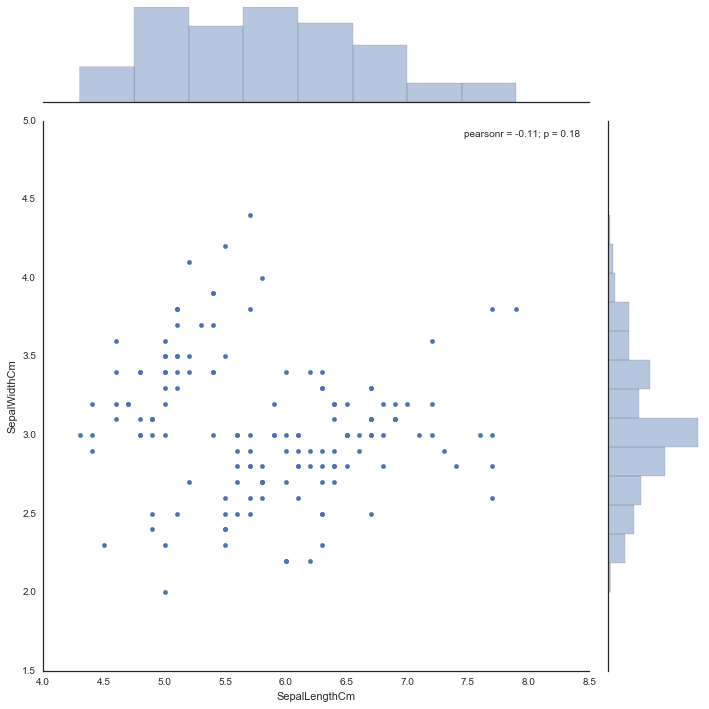

In [53]:
sns.jointplot(x="SepalLengthCm",y="SepalWidthCm",data=iris,size=10)

上面两幅散点图还缺少一个重要信息：没有显示每个点的类属性

我们可以用seaborn的FaceGrid去给每个类别标注不同的颜色

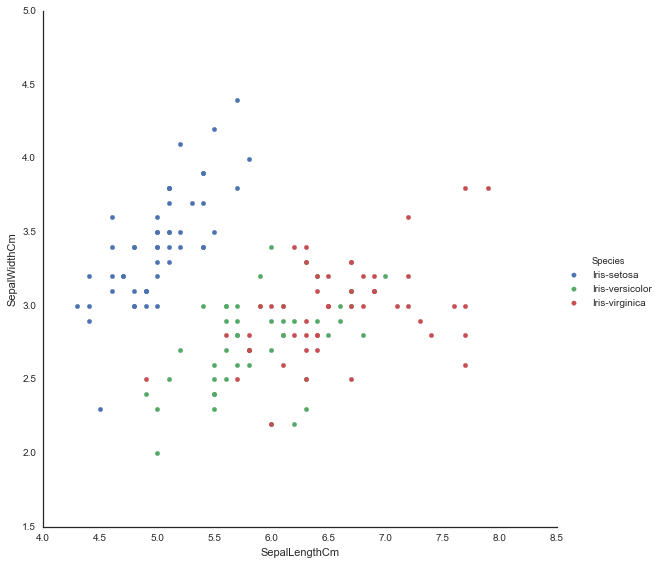

In [54]:

sns.FacetGrid(iris, hue="Species",size=8)\
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
    .add_legend()

我们也可用 boxplot看每个特征在各个类别下的分布情况


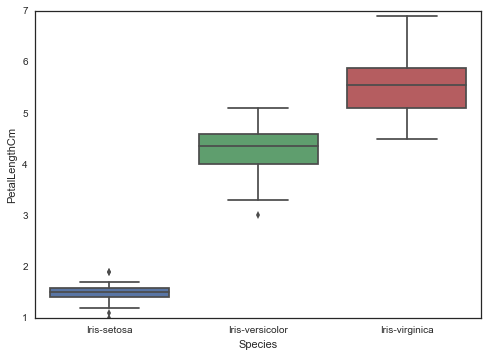

In [55]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)

从上图不难发现，那些类别术语iris-setosa的样本 他们的PetalLengthCm数据范围基本在[1,2],并且集中在1.5左右

再来看看violinplot

数据密集的区域在图中很胖，稀疏的区域就很瘦,

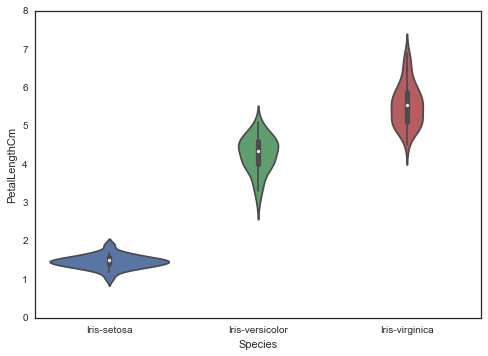

In [56]:

sns.violinplot(x="Species",y="PetalLengthCm",data=iris,size=6)

kdeplot对于观察每个特征数据情况也很有用，
which creates and visualizes a kernel density estimates of the underlying feature

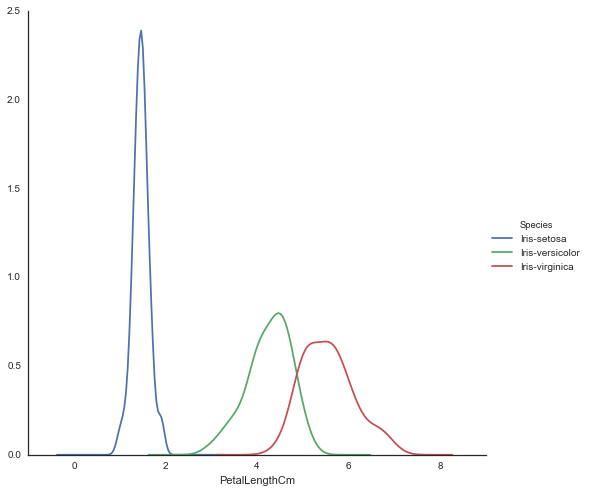

In [57]:
sns.FacetGrid(iris, hue="Species",size=7)\
    .map(sns.kdeplot,"PetalLengthCm")\
    .add_legend()

特征之间往往是相互联系的，pairplot能够观察两个特征之间的联系
注意要去掉Id这一维度

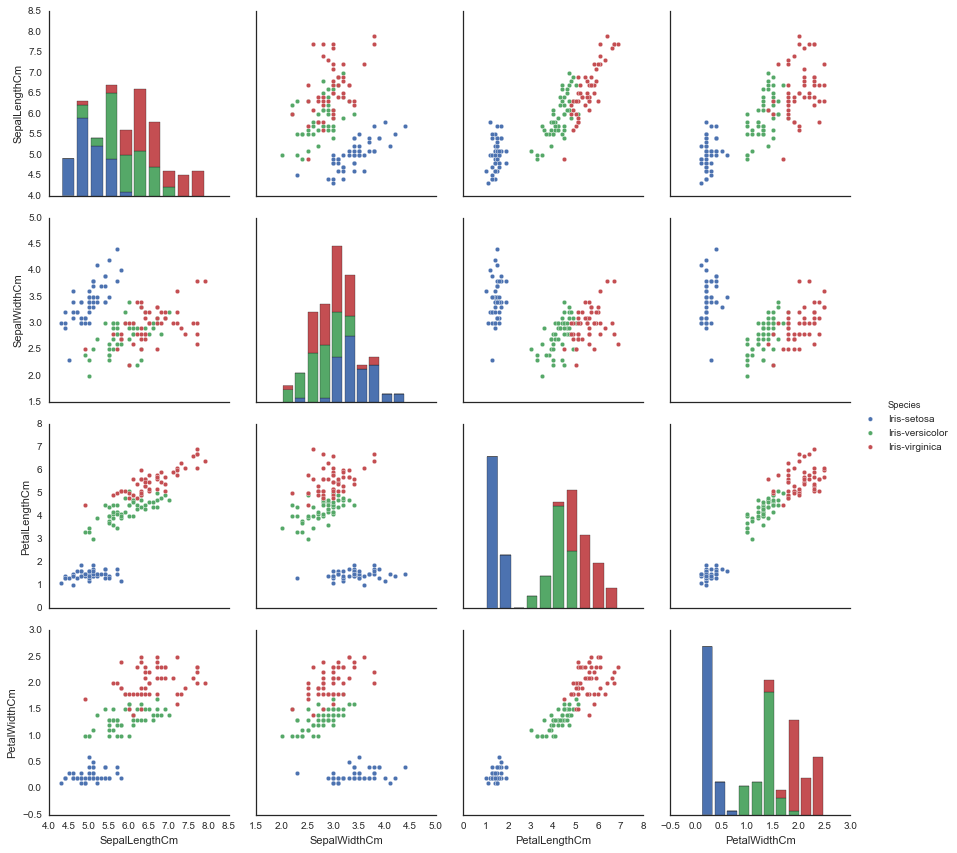

In [60]:
sns.pairplot(iris.drop("Id",axis=1),hue="Species",size=3)




对角线显示的是每个特征的信息，可以其他类型图替换，比如我们可以用kdeplto替换直方图

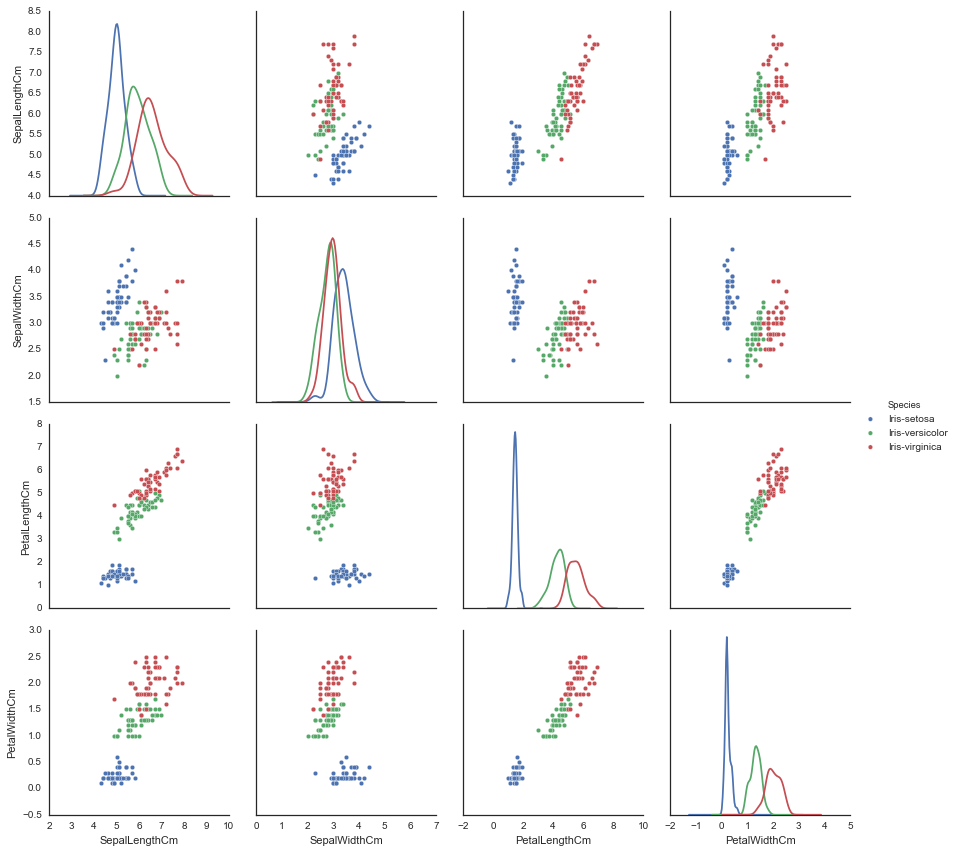

In [61]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

上面基本覆盖了seaborn常用到的图类型

我们再来看下pandas的画图功能，


我们可以对每一个特征画不同类别下的boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1FDA3970>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1FED7F30>]], dtype=object)

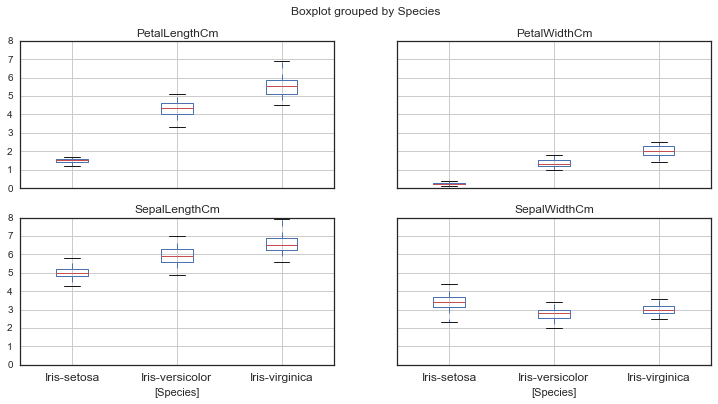

In [63]:
iris.drop("Id",axis=1).boxplot(by="Species", figsize=(12,6))

Andrews Curves： are a method for visualizing multidimensional data by mapping each observation onto a function

Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these

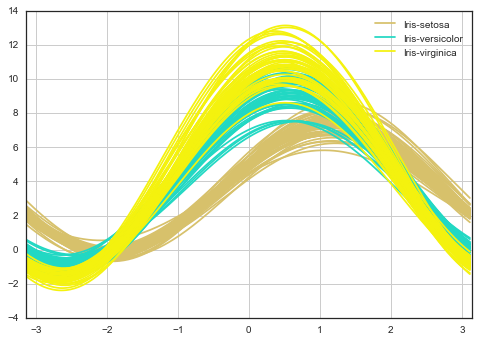

In [64]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

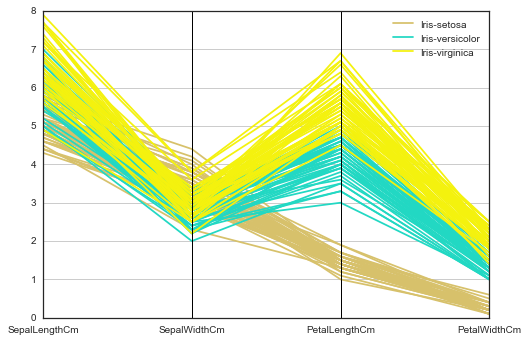

In [65]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

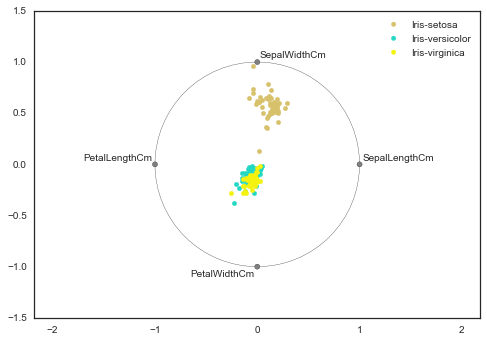

In [66]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")